In [1]:
"""This script has following capabilities:
-can read multiple files
-can read multiple simulation types in a given file
-provides the simulation details
-works even if the final simulation isn't done
-if the middle files has incomplete simulation and file after that starts at different restart
then there will be problems in the plotting, but its minor
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
import re

In [2]:
skip_lines = 100                         # skipping first 100 lines in the plotting to avoid artifacts. 

# Provide the jobids here:
jid_list = [423718,
425431,
436955,
436985,
436993,
455329,
455330
]

#---------Removing the previous folder names
folder_prefix = "Output_"+str(jid_list[0])
folders_to_remove = glob.glob(folder_prefix+"*")
print(folders_to_remove)
for folder_name in folders_to_remove:
    try:
        shutil.rmtree(folder_name)
    except OSError as e:
        e.filename;
#         print("Error: %s - %s." % (e.filename, e.strerror))

# All the files
log_files = [f'Output.{i}' for i in jid_list]


# Concatenate all files
output = "Output.dat"
with open(output, "w") as outfile:
    for filename in log_files:
        with open(filename) as f:
            outfile.write(f.read())


[]


In [3]:
log_file = "Output.dat"
# Find the data section in the log file
with open(log_file, 'r') as f:
    lines = f.readlines()
    data_values = []
    header = None
    error_count = 0
    for i, line in enumerate(lines):
        if line.startswith("Per MPI rank"):
            header = lines[i+1].strip().split()
        if "Time step     :" in line:
            time_step = i
        try:
            words = [list(map(float, line.strip().split()))]
            if words !=[[]]:
                data_values.append(list(map(float, line.strip().split())))
        except ValueError:
            error_count += 1
    print("Number of errors:", error_count)

dt = float(lines[time_step].split()[3])     # Time step used in the simulations
sim_lines = np.array(data_values)

Number of errors: 603


In [4]:
print("Total number of lines:", sim_lines.shape[0])
print("Total number of columns:", sim_lines.shape[1])
print("\n")
print("Thermo quantities\n", header)

# Read the data into a pandas DataFrame
data = pd.DataFrame(sim_lines, columns = header)
data.to_csv('Data.dat')

Total number of lines: 112007
Total number of columns: 11


Thermo quantities
 ['Time', 'Step', 'TotEng', 'KinEng', 'PotEng', 'Temp', 'Press', 'Pxx', 'Pyy', 'Pzz', 'Volume']


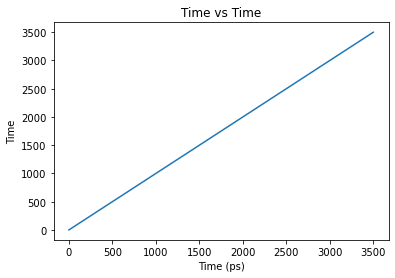

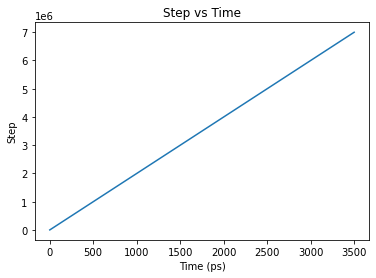

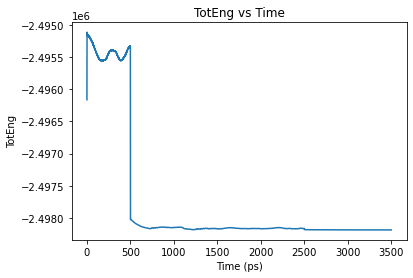

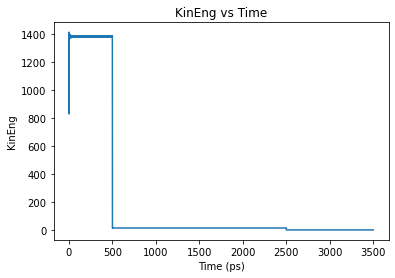

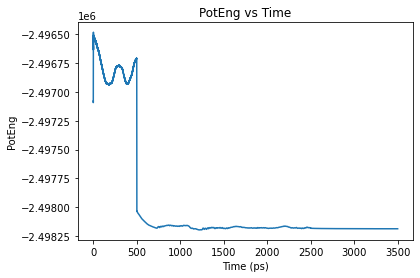

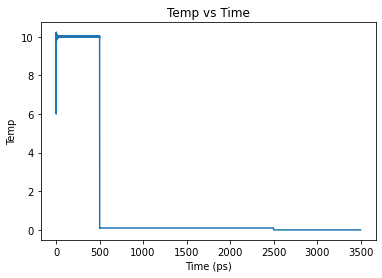

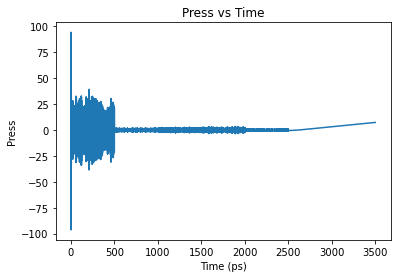

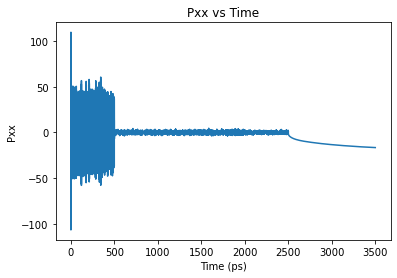

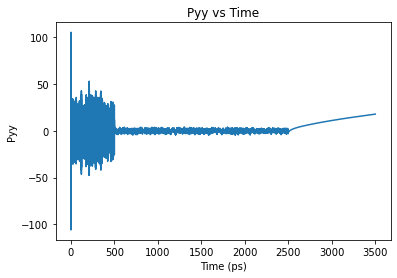

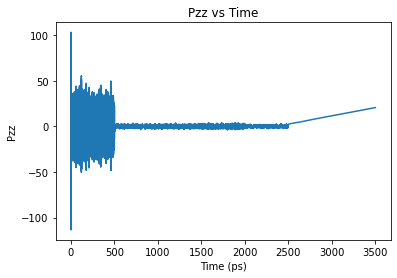

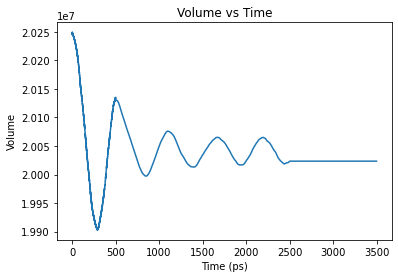

In [5]:
columns = header # ["KinEng", "PotEng", "Temp", "Press", "Volume"]
for column in columns:
    fig, ax = plt.subplots()
    ax.plot(data["Step"][skip_lines:]*dt, data[column][skip_lines:])
    ax.set_xlabel("Time (ps)")
    ax.set_ylabel(column)
    ax.set_title(f"{column} vs Time")

    # Save the figure to a file
    plt.savefig(f"{column}_vs_time.tif", dpi= 100, bbox_inches = 'tight', facecolor="w")
    plt.show()
    # Close the figure to free memory
    plt.close(fig)

In [6]:
directory_path = os.getcwd()
foldername = "Output_" + "_".join(str(x) for x in jid_list)        # Folder name

new_directory_path = os.path.join(directory_path, foldername)
if not os.path.exists(new_directory_path):
    os.makedirs(new_directory_path)

# Move all the *.tif files to the new directory
tif_files = glob.glob("*.tif")
for file in tif_files:
    shutil.move(file, os.path.join(new_directory_path, file))

shutil.move("Output.dat", os.path.join(new_directory_path, "Output.dat"))
shutil.move("Data.dat", os.path.join(new_directory_path, "Data.dat"))

'/mnt/c/Users/rajan/OneDrive - Missouri State University/Research_scripts/LAMMPS_log_reader/Output_423718_425431_436955_436985_436993_455329_455330/Data.dat'